In [20]:
import pandas as pd

review_star = pd.read_csv(r'C:\Users\hopio\movie_review.csv',encoding='utf8')
review_star

,score,review
0,8,진부한 표현이지만 액션의 정수이자 액션의 황홀경이란 말이 딱 어울리는 영화였어요
1,7,다음 편 여지를 남겨 놓는데 또 나름대로 기대가 되네요.
2,10,존윅 특유 액션이 너무 좋다
3,6,계단 떨어질때 항아리 게임 생각났음
4,5,개빠의 비참한 말로를 보여주네요
...,...,...
285,7,러닝타임만 조금 짧았으면
286,10,액션이 너무 좋았습니다.
287,9,무한으로 즐기는 액션맛집
288,10,키아누리브스 대단해ㅎ


In [21]:
#- 전처리(정규식으로 필요 단어만)
#  review ='' or ' '  인 행 삭제 

print(review_star.tail())

review_star['review']=review_star['review'].str.replace(pat=r'[^ A-Za-z0-9가-힣+]',repl= r'', regex=True)  # 정규식 치환
review_star = review_star[review_star['review'] != '']                  # 공백 삭제
review_star = review_star[review_star['review'] != ' ']                 # 스페이스 삭제

print(review_star.tail())

     score                                             review
285      7                                     러닝타임만 조금 짧았으면 
286     10                                     액션이 너무 좋았습니다. 
287      9                                     무한으로 즐기는 액션맛집 
288     10                                       키아누리브스 대단해ㅎ 
289      8  전 세계의 액션을 총망라했다. 키아누 리브스의 몸이 괜찮은지 나도 모르게 움찔 거리...
     score                                             review
285      7                                     러닝타임만 조금 짧았으면 
286     10                                      액션이 너무 좋았습니다 
287      9                                     무한으로 즐기는 액션맛집 
288     10                                        키아누리브스 대단해 
289      8  전 세계의 액션을 총망라했다 키아누 리브스의 몸이 괜찮은지 나도 모르게 움찔 거리며...


In [22]:
# - 형태소 분석 및 벡트라이즈
from konlpy.tag import Komoran
tag = Komoran()
from sklearn.feature_extraction.text import CountVectorizer


In [23]:
#  - TDM 생성

def kor_noun(text):
    words = []
    for w in tag.nouns(text):
        if len(w) > 1:
            words.append(w)
    return words


cv = CountVectorizer(tokenizer=kor_noun, max_features=1000)
tdm = cv.fit_transform(review_star['review'])

C:\Users\hopio\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
print(tdm[0])

  (0, 294)	1
  (0, 164)	2
  (0, 225)	1
  (0, 200)	1
  (0, 318)	1
  (0, 173)	1


In [25]:

print(tdm.shape)

print(review_star.shape)


(286, 327)
(286, 2)


In [26]:

# - 학습 및 검증 테이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tdm, review_star['score'], test_size=.2, random_state =1234)

#print(y_train)

In [27]:

#  - 모델 생성 및 학습
from sklearn.linear_model import LogisticRegressionCV
logreg = LogisticRegressionCV()
logreg.fit(X_train, y_train)


C:\Users\hopio\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hopio\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hopio\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (5, 10) + inhomogeneous part.

In [28]:
#  - 예측 및 평가
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


AttributeError: 'LogisticRegressionCV' object has no attribute 'coef_'

In [29]:
#  - 긍정 및 부정 단어 확인
words = cv.get_feature_names_out()
sent_dict = sorted(zip(logreg.coef_[0], words))

print(sent_dict[:10])
print(sent_dict[-10:])


AttributeError: 'LogisticRegressionCV' object has no attribute 'coef_'

<Axes: >

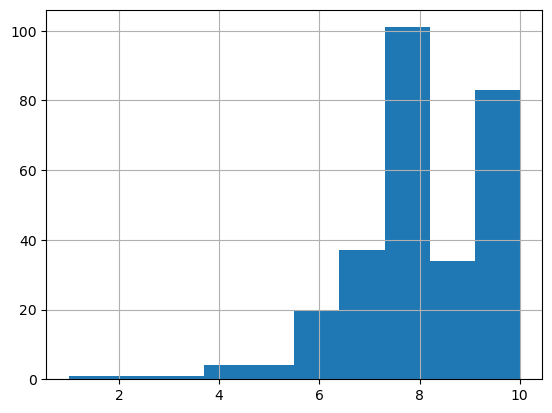

In [30]:
#  - 분포 확인
%matplotlib inline
review_star['score'].hist()
